###**Project Name:** Twitter Sentiment Analysis using SVM

Twitter is a goldmine for understanding public opinion in real-time.
With the Twitter Sentiment Analysis Dataset, researchers can analyze the sentiment behind tweets, whether they're expressing joy about a recent event, frustration about a political decision, or anything in between.

In [8]:
# Import library
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [5]:
!pip install nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

####**Load and Explore Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data_Sets/twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Assign column name (ID, Entity, Sentiment, Tweet)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# Remove Unnecessary column
df.drop(['ID','Entity'], axis=1, inplace=True)
df.head()

,Sentiment,Tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [13]:
df.shape

(74681, 2)

In [12]:
df.isnull().sum()

,0
Sentiment,0
Tweet,686


In [14]:
# Remove Missign Value
df.dropna(subset=['Tweet'], inplace=True)

/tmp/ipython-input-15-1726936920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


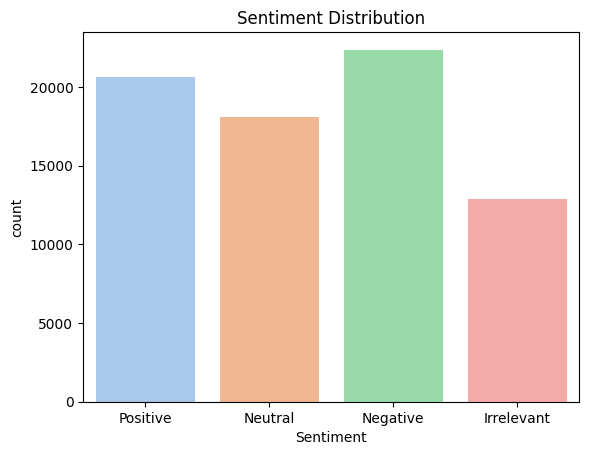

In [15]:
# Sentiment Distribution
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.show()

**Key insight:**

Negative	Has the highest count, indicating a strong tendency of users to express complaints, criticism, or frustration on Twitter.

Positive	Comes close to negative but still slightly lower, suggesting users also share appreciable feedback but less frequently.

Neutral	Slightly lower than positive, indicating a fair number of factual or emotionless tweets.

Irrelevant	Lowest count, implying the dataset has a moderate amount of noise (spam, off-topic, or non-informative content).

####**Data Preprocessing**

In [19]:
# Clean the text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)         # remove Url
    text = re.sub(r'@\w+|#\w+', '', text)                       # remove mentions/hashtags
    text = re.sub(r'\d+', '', text)                             # remove digits
    text = text.lower()                                         # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_tweet'] = df['Tweet'].apply(clean_text)

####**Encode Sentiments**

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])  # maps labels to 0, 1, 2, etc.


####**Split the Dataset**

In [21]:
X = df['cleaned_tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####**TF-IDF Vectorization**

In [22]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


####**Train SVM Classifier**

In [24]:
svm = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
svm.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

####**Evaluate the Model**

In [25]:
y_pred = svm.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.6988310020947361
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.68      0.56      0.62      2624
    Negative       0.70      0.81      0.75      4463
     Neutral       0.71      0.62      0.67      3589
    Positive       0.70      0.73      0.72      4123

    accuracy                           0.70     14799
   macro avg       0.70      0.68      0.69     14799
weighted avg       0.70      0.70      0.70     14799



**Key insight:**

Negative sentiment detection is strongest, with the highest recall (0.81), meaning the model is very good at correctly identifying most of the negative tweets.

Positive sentiment also performs well across all metrics, especially with a strong F1-score (0.72).

Irrelevant tweets show the lowest recall (0.56), suggesting the model struggles to correctly identify irrelevant content.

Neutral sentiment tends to be the most ambiguous in NLP tasks, and here it shows moderate performance with a slightly lower F1-score (0.67).

 **Macro vs Weighted Average:**

Macro Avg (0.69 F1-score) treats all classes equally, showing the model is fairly balanced across categories.

Weighted Avg (0.70 F1-score) takes class imbalance into account, reinforcing the model’s overall robustness given real-world data distribution.



**Conclusion:**

The model demonstrates strong generalization for detecting sentiment in tweets, particularly for negative and positive sentiments, which are typically easier for SVM to classify due to their more distinct vocabulary.

However, there's room for improvement, especially in recalling Irrelevant tweets, possibly by enhancing the feature engineering, adding contextual embeddings (like BERT), or oversampling minority classes.